In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

In [3]:
files = ["split_1.csv","split_2.csv","split_3.csv","split_4.csv"]
#files = ["split_1.csv","split_2_v2.csv","split_3.csv","split_4.csv"]
dfs = []
for filename in files:
    i_df = pd.read_csv("../eval/quantifications/{}".format(filename))
    dfs.append(i_df)

df = pd.concat(dfs,sort=False)
filenames = list(df["filename"].unique())


full_df = pd.read_csv("../pre_results/full_ref_df.csv")
acc_df = pd.read_csv("../pre_results/acc_ref_df.csv")

full_df = full_df[full_df["filename"].isin(filenames)]
acc_df = acc_df[acc_df["filename"].isin(filenames)]

c_df = pd.merge(df,full_df,on="filename",suffixes=("","_full"))
c_df = pd.merge(c_df,acc_df,on="filename",suffixes=("_model","_acc"))

df["model"]="model"
full_df["model"]="full"
acc_df["model"]="acc"
df = pd.concat([df,full_df,acc_df],sort=False)

c_df["gaba_conc_cr_model_error"] = c_df["gaba_conc_cr_model"]-c_df["gaba_conc_cr_full"]
c_df["gaba_conc_cr_model_abs_error"] = abs(c_df["gaba_conc_cr_model_error"])
c_df["gaba_conc_water_model_error"] = c_df["gaba_conc_water_model"]-c_df["gaba_conc_water_full"]
c_df["gaba_conc_water_model_abs_error"] = abs(c_df["gaba_conc_water_model_error"])

c_df["gaba_conc_cr_acc_error"] = c_df["gaba_conc_cr_acc"]-c_df["gaba_conc_cr_full"]
c_df["gaba_conc_cr_acc_abs_error"] = abs(c_df["gaba_conc_cr_acc_error"])
c_df["gaba_conc_water_acc_error"] = c_df["gaba_conc_water_acc"]-c_df["gaba_conc_water_full"]
c_df["gaba_conc_water_acc_abs_error"] = abs(c_df["gaba_conc_water_acc_error"])

c_df["gaba_conc_cr_model_rel_error"] = c_df["gaba_conc_cr_model_error"]/c_df["gaba_conc_cr_full"]
c_df["gaba_conc_cr_acc_rel_error"] = c_df["gaba_conc_cr_acc_error"]/c_df["gaba_conc_cr_full"]
c_df["gaba_conc_cr_model_rel_abs_error"] = c_df["gaba_conc_cr_model_abs_error"]/c_df["gaba_conc_cr_full"]
c_df["gaba_conc_cr_acc_rel_abs_error"] = c_df["gaba_conc_cr_acc_abs_error"]/c_df["gaba_conc_cr_full"]

In [3]:
#### CR difference analysis
## simple table and analysis
print("Conc Cr Abs Error:")
print(f"Means + Std => Model: {c_df['gaba_conc_cr_model_abs_error'].mean():.3f} +- {c_df['gaba_conc_cr_model_abs_error'].std():.3f} / Acc: {c_df['gaba_conc_cr_acc_abs_error'].mean():.3f} +- {c_df['gaba_conc_cr_acc_abs_error'].std():.3f} => p-value: {st.wilcoxon(c_df['gaba_conc_cr_model_abs_error'],c_df['gaba_conc_cr_acc_abs_error']).pvalue:.4f}")
print(f"Medians => Model: {c_df['gaba_conc_cr_model_abs_error'].median():.3f} / Acc: {c_df['gaba_conc_cr_acc_abs_error'].median():.3f}")
print("")
#print("Conc water Abs Error:")
#print(f"Means + Std => Model: {c_df['gaba_conc_water_model_abs_error'].mean():.3f} +- {c_df['gaba_conc_water_model_abs_error'].std():.3f} / Acc: {c_df['gaba_conc_water_acc_abs_error'].mean():.3f} +- {c_df['gaba_conc_water_acc_abs_error'].std():.3f} => p-value: {st.wilcoxon(c_df['gaba_conc_water_model_abs_error'],c_df['gaba_conc_water_acc_abs_error']).pvalue:.4f}")
#print(f"Medians => Model: {c_df['gaba_conc_water_model_abs_error'].median():.3f} / Acc: {c_df['gaba_conc_water_acc_abs_error'].median():.3f}")
#print("")
print("Conc Cr rel Error:")
print(f"Means + Std => Model: {c_df['gaba_conc_cr_model_rel_abs_error'].mean():.3f} +- {c_df['gaba_conc_cr_model_rel_abs_error'].std():.3f} / Acc: {c_df['gaba_conc_cr_acc_rel_abs_error'].mean():.3f} +- {c_df['gaba_conc_cr_acc_rel_abs_error'].std():.3f} => p-value: {st.wilcoxon(c_df['gaba_conc_cr_model_rel_abs_error'],c_df['gaba_conc_cr_acc_rel_abs_error']).pvalue:.4f}")
print(f"Medians => Model: {c_df['gaba_conc_cr_model_rel_abs_error'].median():.3f} / Acc: {c_df['gaba_conc_cr_acc_rel_abs_error'].median():.3f}")
print("")
print("SNRs")
##filter infinite SNR'set
print(c_df.shape)
i_cdf = c_df[c_df["gaba_snr_model"]<500].copy()
print(i_cdf.shape)
print(f"Means: Model: {i_cdf['gaba_snr_model'].mean():.1f} +/- {i_cdf['gaba_snr_model'].std():.1f}  / Full: {c_df['gaba_snr_full'].mean():.1f} +/- {c_df['gaba_snr_full'].std():.1f} / Acc: {c_df['gaba_snr_acc'].mean():.1f} +/- {c_df['gaba_snr_acc'].std():.1f}")
print(f"p-values: Model/Full {st.wilcoxon(i_cdf['gaba_snr_model'],i_cdf['gaba_snr_full']).pvalue:.4f} - Model/Acc {st.wilcoxon(i_cdf['gaba_snr_model'],i_cdf['gaba_snr_acc']).pvalue:.4f} - Full/Acc {st.wilcoxon(c_df['gaba_snr_full'],c_df['gaba_snr_acc']).pvalue:.4f}")
print(f"Medians: Model: {c_df['gaba_snr_model'].median():.1f} / Full: {c_df['gaba_snr_full'].median():.1f} / Acc: {c_df['gaba_snr_acc'].median():.1f}")
print("")
print("Fit Errors")
print(f"Means: Model: {c_df['gaba_fit_error_model'].mean():.1f} +/- {c_df['gaba_fit_error_model'].std():.1f} / Full: {c_df['gaba_fit_error_full'].mean():.1f} +/- {c_df['gaba_fit_error_full'].std():.1f} / Acc: {c_df['gaba_fit_error_acc'].mean():.1f} +/- {c_df['gaba_fit_error_acc'].std():.1f}")
print(f"p-values: Model/Full {st.wilcoxon(c_df['gaba_fit_error_model'],c_df['gaba_fit_error_full']).pvalue:.4f} - Model/Acc {st.wilcoxon(c_df['gaba_fit_error_model'],c_df['gaba_fit_error_acc']).pvalue:.4f} - Full/Acc {st.wilcoxon(c_df['gaba_fit_error_full'],c_df['gaba_fit_error_acc']).pvalue:.4f}")
print(f"Medians: Model: {c_df['gaba_fit_error_model'].median():.1f} / Full: {c_df['gaba_fit_error_full'].median():.1f} / Acc: {c_df['gaba_fit_error_acc'].median():.1f}")

Conc Cr Abs Error:
Means + Std => Model: 0.043 +- 0.245 / Acc: 0.071 +- 0.556 => p-value: 0.0322
Medians => Model: 0.012 / Acc: 0.008

Conc Cr rel Error:
Means + Std => Model: 0.385 +- 2.826 / Acc: 0.705 +- 6.585 => p-value: 0.0466
Medians => Model: 0.102 / Acc: 0.070

SNRs
(144, 43)
(90, 43)
Means: Model: 58.2 +/- 40.7  / Full: 22.3 +/- 7.0 / Acc: 11.6 +/- 6.2
p-values: Model/Full 0.0000 - Model/Acc 0.0000 - Full/Acc 0.0000
Medians: Model: 78.1 / Full: 21.8 / Acc: 10.8

Fit Errors
Means: Model: 4.3 +/- 2.2 / Full: 4.7 +/- 2.2 / Acc: 7.0 +/- 4.4
p-values: Model/Full 0.0079 - Model/Acc 0.0000 - Full/Acc 0.0000
Medians: Model: 3.8 / Full: 3.9 / Acc: 5.6


In [6]:
#### CR difference analysis
## simple table and analysis
print("Conc Cr Abs Error:")
print(f"Means + Std => Model: {c_df['gaba_conc_cr_model_abs_error'].mean():.3f} +- {c_df['gaba_conc_cr_model_abs_error'].std():.3f} / Acc: {c_df['gaba_conc_cr_acc_abs_error'].mean():.3f} +- {c_df['gaba_conc_cr_acc_abs_error'].std():.3f} => p-value: {st.wilcoxon(c_df['gaba_conc_cr_model_abs_error'],c_df['gaba_conc_cr_acc_abs_error'],alternative='greater').pvalue:.4f}")
print(f"Medians => Model: {c_df['gaba_conc_cr_model_abs_error'].median():.3f} / Acc: {c_df['gaba_conc_cr_acc_abs_error'].median():.3f}")
print("")
#print("Conc water Abs Error:")
#print(f"Means + Std => Model: {c_df['gaba_conc_water_model_abs_error'].mean():.3f} +- {c_df['gaba_conc_water_model_abs_error'].std():.3f} / Acc: {c_df['gaba_conc_water_acc_abs_error'].mean():.3f} +- {c_df['gaba_conc_water_acc_abs_error'].std():.3f} => p-value: {st.wilcoxon(c_df['gaba_conc_water_model_abs_error'],c_df['gaba_conc_water_acc_abs_error']).pvalue:.4f}")
#print(f"Medians => Model: {c_df['gaba_conc_water_model_abs_error'].median():.3f} / Acc: {c_df['gaba_conc_water_acc_abs_error'].median():.3f}")
#print("")
print("Conc Cr rel Error:")
print(f"Means + Std => Model: {c_df['gaba_conc_cr_model_rel_abs_error'].mean():.3f} +- {c_df['gaba_conc_cr_model_rel_abs_error'].std():.3f} / Acc: {c_df['gaba_conc_cr_acc_rel_abs_error'].mean():.3f} +- {c_df['gaba_conc_cr_acc_rel_abs_error'].std():.3f} => p-value: {st.wilcoxon(c_df['gaba_conc_cr_model_rel_abs_error'],c_df['gaba_conc_cr_acc_rel_abs_error'],alternative='greater').pvalue:.4f}")
print(f"Medians => Model: {c_df['gaba_conc_cr_model_rel_abs_error'].median():.3f} / Acc: {c_df['gaba_conc_cr_acc_rel_abs_error'].median():.3f}")



Conc Cr Abs Error:
Means + Std => Model: 0.043 +- 0.245 / Acc: 0.071 +- 0.556 => p-value: 0.0161
Medians => Model: 0.012 / Acc: 0.008

Conc Cr rel Error:
Means + Std => Model: 0.385 +- 2.826 / Acc: 0.705 +- 6.585 => p-value: 0.0233
Medians => Model: 0.102 / Acc: 0.070


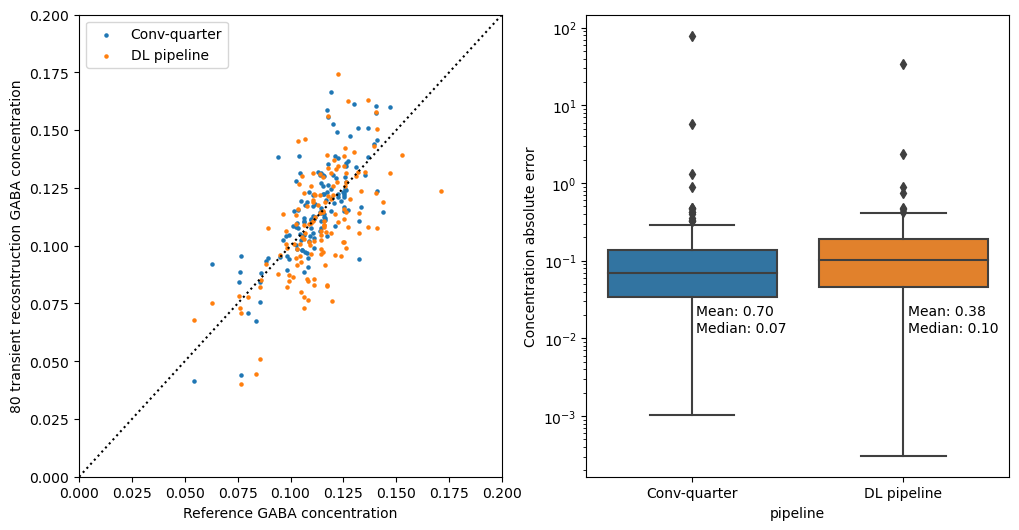

In [12]:
fig,ax = plt.subplots(1,2,figsize=(12,6))

ax[0].scatter(c_df["gaba_conc_cr_full"],c_df["gaba_conc_cr_acc"],label="Conv-quarter",s=5)
ax[0].scatter(c_df["gaba_conc_cr_full"],c_df["gaba_conc_cr_model"],label="DL pipeline",s=5)

ii_df = c_df[(c_df["gaba_conc_cr_acc"]<0.2)&(c_df["gaba_conc_cr_model"]<0.2)]


acc_pearson = st.pearsonr(ii_df["gaba_conc_cr_full"],ii_df["gaba_conc_cr_acc"]).statistic
mod_pearson = st.pearsonr(ii_df["gaba_conc_cr_full"],ii_df["gaba_conc_cr_model"]).statistic



ax[0].set_xlim(0,0.2)
ax[0].set_ylim(0,0.2)
ax[0].plot([0,0.2],[0,0.2],linestyle=":",color="black")
ax[0].legend()
ax[0].set_xlabel("Conv-full Concentration")
ax[0].set_xlabel("Conv-full Concentration")

#i_df = df[df["model"].isin(["model","gannet_quarter"])]
#i_df["model"] = i_df.apply(lambda x: "DL pipeline" if x["model"]=="model" else "Conv-quarter",axis=1)

acc_error = c_df["gaba_conc_cr_acc_rel_abs_error"].values.flatten()
model_error = c_df["gaba_conc_cr_model_rel_abs_error"].values.flatten()

a_df = pd.DataFrame({"pipeline":"Conv-quarter","conc_abs_error":acc_error})
b_df = pd.DataFrame({"pipeline":"DL pipeline","conc_abs_error":model_error})

i_df = pd.concat([a_df,b_df])

sns.boxplot(data=i_df,ax=ax[1],x="pipeline",y="conc_abs_error")
ax[1].annotate(f"Mean: {acc_error.mean():.2f}",xy=(0.02,0.02))
ax[1].annotate(f"Median: {c_df['gaba_conc_cr_acc_rel_abs_error'].median():.2f}",xy=(0.02,0.012))

ax[1].annotate(f"Mean: {model_error.mean():.2f}",xy=(1.02,0.02))
ax[1].annotate(f"Median: {c_df['gaba_conc_cr_model_rel_abs_error'].median():.2f}",xy=(1.02,0.012))



ax[1].set_yscale("log")

ax[0].set_xlabel("Reference GABA concentration")
ax[0].set_ylabel("80 transient recosntruction GABA concentration")

ax[1].set_ylabel("Concentration absolute error")


#ax[0].annotate(f"Conv-quarter Pearson: {acc_pearson:.2f}",(0.01,0.17),ha="center")
#ax[0].annotate(f"DL pipeline Pearson: {mod_pearson:.2f}",(0.01,0.16),ha="center")

plt.show()

In [ ]:
### Making graph of comparison

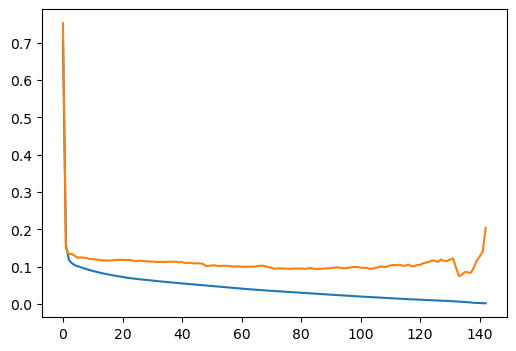

In [4]:
#### how results change after filtering a bit the worse results
i_df = c_df.sort_values("gaba_conc_cr_acc_rel_abs_error",ascending=False)
filename_list = list(i_df["filename"])

abs_error_accs = []
abs_error_models=[]

for i in range(len(filename_list)-1):
    i_df = c_df[~c_df["filename"].isin(filename_list[:i])]
    abs_error_models.append(i_df['gaba_conc_cr_model_rel_abs_error'].mean())
    abs_error_accs.append(i_df['gaba_conc_cr_acc_rel_abs_error'].mean())

fig,ax = plt.subplots(figsize=(6,4))

ax.plot(abs_error_accs,label="accs")
ax.plot(abs_error_models,label="models")

plt.show()

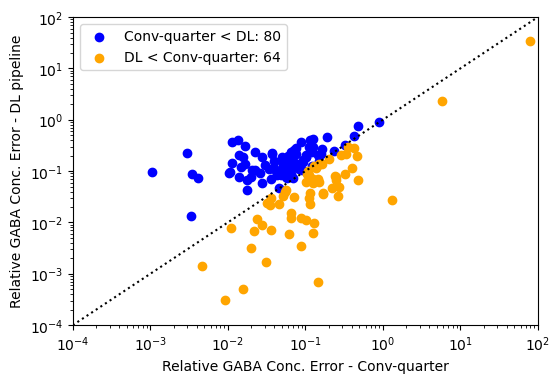

In [4]:


fig,ax = plt.subplots(figsize=(6,4))

i_df = c_df.copy()
i_df["color"] = i_df.apply(lambda x: "orange" if x["gaba_conc_cr_acc_rel_abs_error"]>x["gaba_conc_cr_model_rel_abs_error"] else "blue",axis=1)
for color in list(i_df["color"].unique()):
    ii_df = i_df[i_df["color"]==color]
    if color=="orange":
        label = f"DL < Conv-quarter: {ii_df.shape[0]}"
    elif color=="blue":
        label = f"Conv-quarter < DL: {ii_df.shape[0]}"

    ax.scatter(ii_df["gaba_conc_cr_acc_rel_abs_error"],ii_df["gaba_conc_cr_model_rel_abs_error"],color=color,label=label)

ax.set_xlim(0.0001,100)
ax.set_ylim(0.0001,100)
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel("Relative GABA Conc. Error - Conv-quarter")
ax.set_ylabel("Relative GABA Conc. Error - DL pipeline")

ax.plot([0.0001,100],[0.0001,100],"k:")

plt.legend()
plt.show()

In [9]:
### test retest reliability
i_df = c_df.copy()
i_df["mean_model"]=(i_df["gaba_conc_cr_model"]+i_df["gaba_conc_cr_full"])/2
i_df["mean_acc"]=(i_df["gaba_conc_cr_acc"]+i_df["gaba_conc_cr_full"])/2
i_df["cv_model"] = np.sqrt(np.square(i_df["mean_model"]-i_df["gaba_conc_cr_model"])+np.square(i_df["mean_model"]-i_df["gaba_conc_cr_full"]))/i_df["mean_model"]
i_df["cv_acc"] = np.sqrt(np.square(i_df["mean_acc"]-i_df["gaba_conc_cr_acc"])+np.square(i_df["mean_acc"]-i_df["gaba_conc_cr_full"]))/i_df["mean_acc"]


print(i_df[["cv_model","cv_acc"]].mean())
print(i_df[["cv_model","cv_acc"]].std())
print(i_df[["cv_model","cv_acc"]].median())
print(st.wilcoxon(i_df["cv_model"],i_df["cv_acc"]).pvalue)

### pearson correlation
print("Pearson correlation")
ii_df=i_df.copy()
ii_df = ii_df[ii_df["gaba_conc_cr_model_rel_abs_error"]<0.5]
ii_df = ii_df[ii_df["gaba_conc_cr_acc_rel_abs_error"]<0.5]
print(ii_df.shape)
print(f"Model:{st.pearsonr(ii_df['gaba_conc_cr_model'],ii_df['gaba_conc_cr_full'])}")
print(f"Acc:{st.pearsonr(ii_df['gaba_conc_cr_acc'],ii_df['gaba_conc_cr_full'])}")



cv_model    0.116051
cv_acc      0.098086
dtype: float64
cv_model    0.181363
cv_acc      0.180370
dtype: float64
cv_model    0.065573
cv_acc      0.049947
dtype: float64
0.013551057734083213
Pearson correlation
(138, 47)
Model:PearsonRResult(statistic=0.6529090306242245, pvalue=4.040688925316621e-18)
Acc:PearsonRResult(statistic=0.7823561958748457, pvalue=9.40524766451808e-30)


In [53]:
c_df[["filename","gaba_conc_cr_model_abs_error"]].sort_values("gaba_conc_cr_model_abs_error",ascending=False)

,filename,gaba_conc_cr_model_abs_error
58,p10_s02,2.824313
118,g8_s08,0.750247
7,g7_s11,0.443978
85,p4_s05,0.214509
114,g7_s07,0.052070
...,...,...
77,g5_s06,0.000192
81,g8_s04,0.000158
115,g7_s08,0.000090
4,g5_s11,0.000055


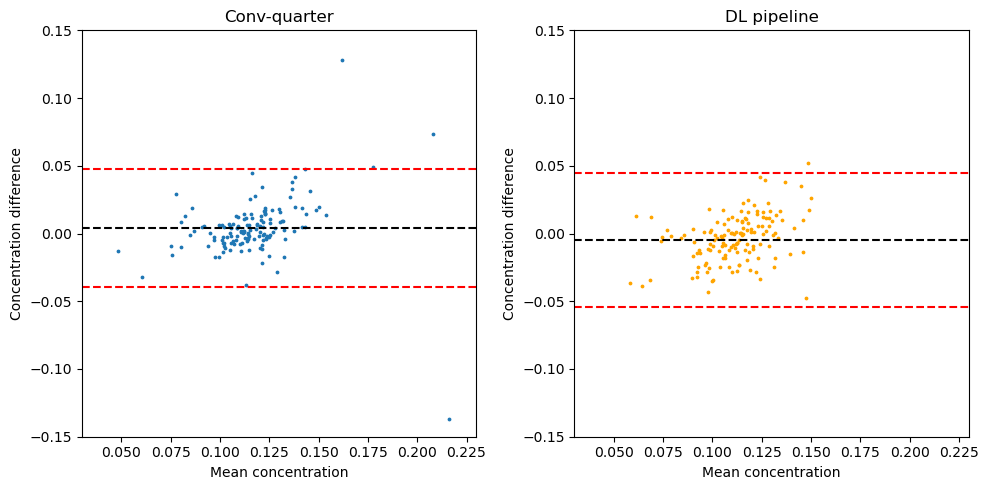

In [6]:
i_df = c_df.copy()
filenames_to_filter = ["g7_s11","p10_s02","g8_s08"]
i_df = i_df[~i_df["filename"].isin(filenames_to_filter)]


fig,ax = plt.subplots(1,2,figsize=(10,5))

i_df["mean_model"]=(i_df["gaba_conc_cr_model"]+i_df["gaba_conc_cr_full"])/2
i_df["mean_acc"]=(i_df["gaba_conc_cr_acc"]+i_df["gaba_conc_cr_full"])/2
i_df["diff_model"] = i_df["gaba_conc_cr_model_error"]
i_df["diff_acc"] = i_df["gaba_conc_cr_acc_error"]
#i_df["mean_model"] = (i_df["gaba_conc_cr_model"]/i_df["gaba_conc_cr_full"]+1)/2
#i_df["mean_acc"] = (i_df["gaba_conc_cr_acc"]/i_df["gaba_conc_cr_full"]+1)/2
#i_df["diff_model"] = i_df["gaba_conc_cr_model_rel_error"]
#i_df["diff_acc"] = i_df["gaba_conc_cr_acc_rel_error"]


ax[0].scatter(i_df["mean_acc"],i_df["diff_acc"],s=3)
ax[0].hlines(i_df["diff_acc"].mean(),0.03,0.23,color="black",linestyles="--")
ax[0].hlines([i_df["diff_acc"].mean()+1.96*i_df["diff_acc"].std(),
             i_df["diff_acc"].mean()-1.96*i_df["diff_acc"].std()],0.03,0.23,color="red",linestyles="--")

ax[1].scatter(i_df["mean_model"],i_df["diff_model"],color="orange",s=3)
ax[1].hlines(i_df["diff_model"].mean(),0.03,0.23,color="black",linestyles="--")
ax[1].hlines([i_df["diff_model"].mean()+1.96*i_df["diff_model"].std(),
             i_df["diff_model"].mean()-1.96*i_df["diff_model"].std()],0.03,0.23,color="red",linestyles="--")

for i in range(2):
    pass
    ax[i].set_xlim(0.03,0.23)
    ax[i].set_ylim(-0.15,0.15)
    ax[i].set_ylabel("Concentration difference")
    ax[i].set_xlabel("Mean concentration")
#ax[0].set_ylim(-0.05,0.05)
#ax[1].set_ylim(-0.05,0.05)

#print(i_df[["filename","diff_acc"]].sort_values("diff_acc"))

ax[0].set_title("Conv-quarter")
ax[1].set_title("DL pipeline")

plt.tight_layout()
plt.show()


In [6]:
c_df[["gaba_conc_cr_model_abs_error","gaba_conc_cr_acc_abs_error"]].mean()
c_df[["gaba_conc_cr_model_abs_error","gaba_conc_cr_acc_abs_error"]].median()
c_df[["gaba_conc_cr_model_abs_error","gaba_conc_cr_acc_abs_error"]].std()

gaba_conc_cr_model_abs_error    0.334425
gaba_conc_cr_acc_abs_error      0.781733
dtype: float64